In [1]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [4]:
df = pd.DataFrame(data)
df.style.set_properties(**{'background-color': '#e3c8d2'}, subset=['Personal Loan'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# No null vales and Dtype is also okay.
#let's check the data now
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [7]:
# Experience has a negitive value in min
p = df[df['Experience']<0]
p.style.set_properties(**{'background-color': '#e3c8d2'}, subset=['Experience'])

In [8]:
df['Experience'] = abs(df['Experience'])

In [9]:
df[df['Experience']<0]   #now negitive value exists now

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [10]:
# Duplicated data
df.duplicated().sum()

0

In [11]:
#CCAvg is based on month, while Income is based on year. So, we decide to convert income monthly
df['Income'] = round(df['Income']/12, 2)
df.head(10).style.set_properties(**{'background-color': '#e3c8d2'}, subset=['Income'])

In [12]:
# Drop ID and ZIP Code columns from dataset
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [13]:
numerical_columns = list(df.loc[:,['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
categorical_columns = list(df.loc[:,['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']])

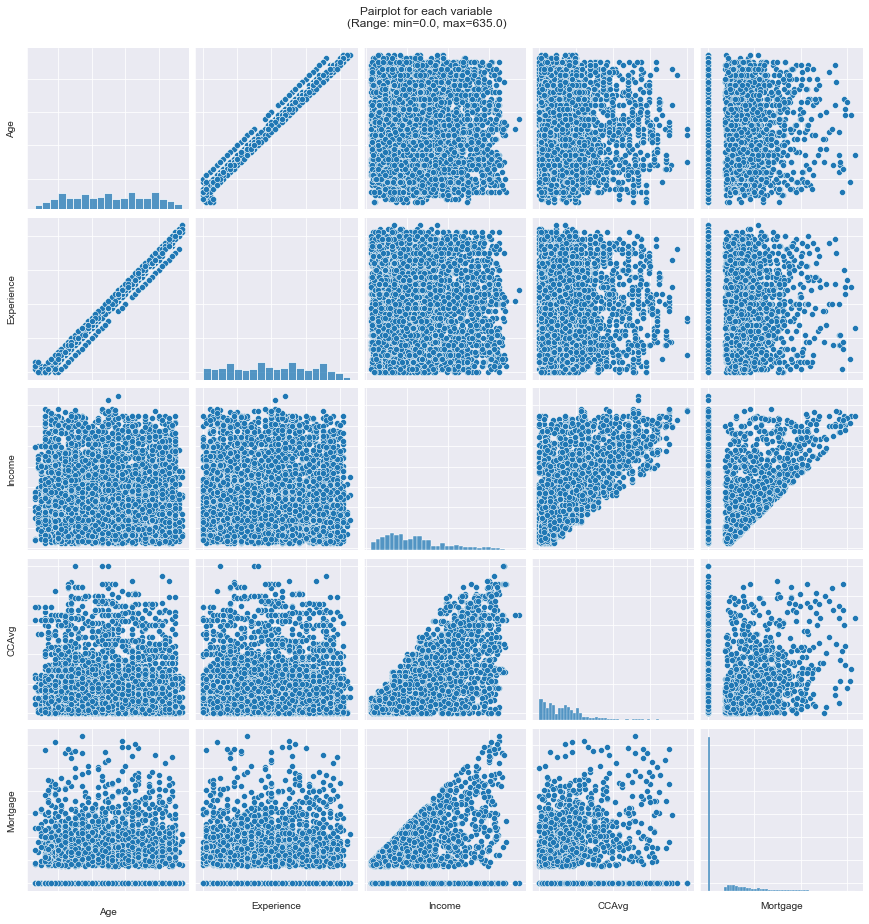

In [14]:
sns.set_style('darkgrid')
dnp = sns.pairplot(df.loc[:, numerical_columns], palette=['PuBu'])

# Add axis labels and tick labels to the plot
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(numerical_columns[0], fontsize=10)
dnp.axes[-1][0].set_xlabel(numerical_columns[0], fontsize=10)
dnp.axes[-1][0].xaxis.labelpad = 10
dnp.axes[-1][-1].yaxis.labelpad = 10

# Title of the plot
dnp.fig.suptitle('Pairplot for each variable\n(Range: min={}, max={})'.format(df[numerical_columns].min().min(), df[numerical_columns].max().max()), y=1.03, fontsize=12)

# Show the plot
plt.show()


In [15]:
# Separate numerical features
num_cols = pd.DataFrame (df, columns= ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cat_cols = pd.DataFrame (df, columns= ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'])

In [16]:
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
IQR.to_frame()

0
Age          20.00
Experience   20.00
Income        4.92
CCAvg         1.80
Mortgage    101.00

In [17]:
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))
outliers

Age  Experience  Income  CCAvg  Mortgage
0     False       False   False  False     False
1     False       False   False  False     False
2     False       False   False  False     False
3     False       False   False  False     False
4     False       False   False  False     False
...     ...         ...     ...    ...       ...
4995  False       False   False  False     False
4996  False       False   False  False     False
4997  False       False   False  False     False
4998  False       False   False  False     False
4999  False       False   False  False     False

[5000 rows x 5 columns]

In [18]:
num_outliers = outliers.sum()
num_outliers

Age             0
Experience      0
Income         96
CCAvg         324
Mortgage      291
dtype: int64

In [19]:
num_outliers.to_frame().T

Age  Experience  Income  CCAvg  Mortgage
0    0           0      96    324       291

Total number of features except for the target: 11
Number of categorical (<25 Unique Values) features: 6
Number of continuous features: 5


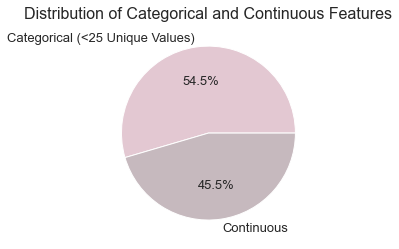

In [20]:
TARGET = 'Personal Loan'
FEATURES = [col for col in df.columns if col not in ['df', TARGET]]

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Total number of features except for the target: {len(FEATURES)}")
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print(f"\033[96mNumber of continuous features: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#e3c8d2', '#c6b9be']

plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()

In [21]:
y = df['Personal Loan']
print(f'Percentage of Borrowed loan:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} Customer)\nPercentage of Unborrowed loan: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} Customer)')

Percentage of Borrowed loan:  9.6 %  --> (480 Customer)
Percentage of Unborrowed loan: 90.4  %  --> (4520 Customer)


In [22]:
y = df['Personal Loan']
print(f'Percentage of Borrowed loan:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} Customer)\nPercentage of Unborrowed loan: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} Customer)')

Percentage of Borrowed loan:  9.6 %  --> (480 Customer)
Percentage of Unborrowed loan: 90.4  %  --> (4520 Customer)


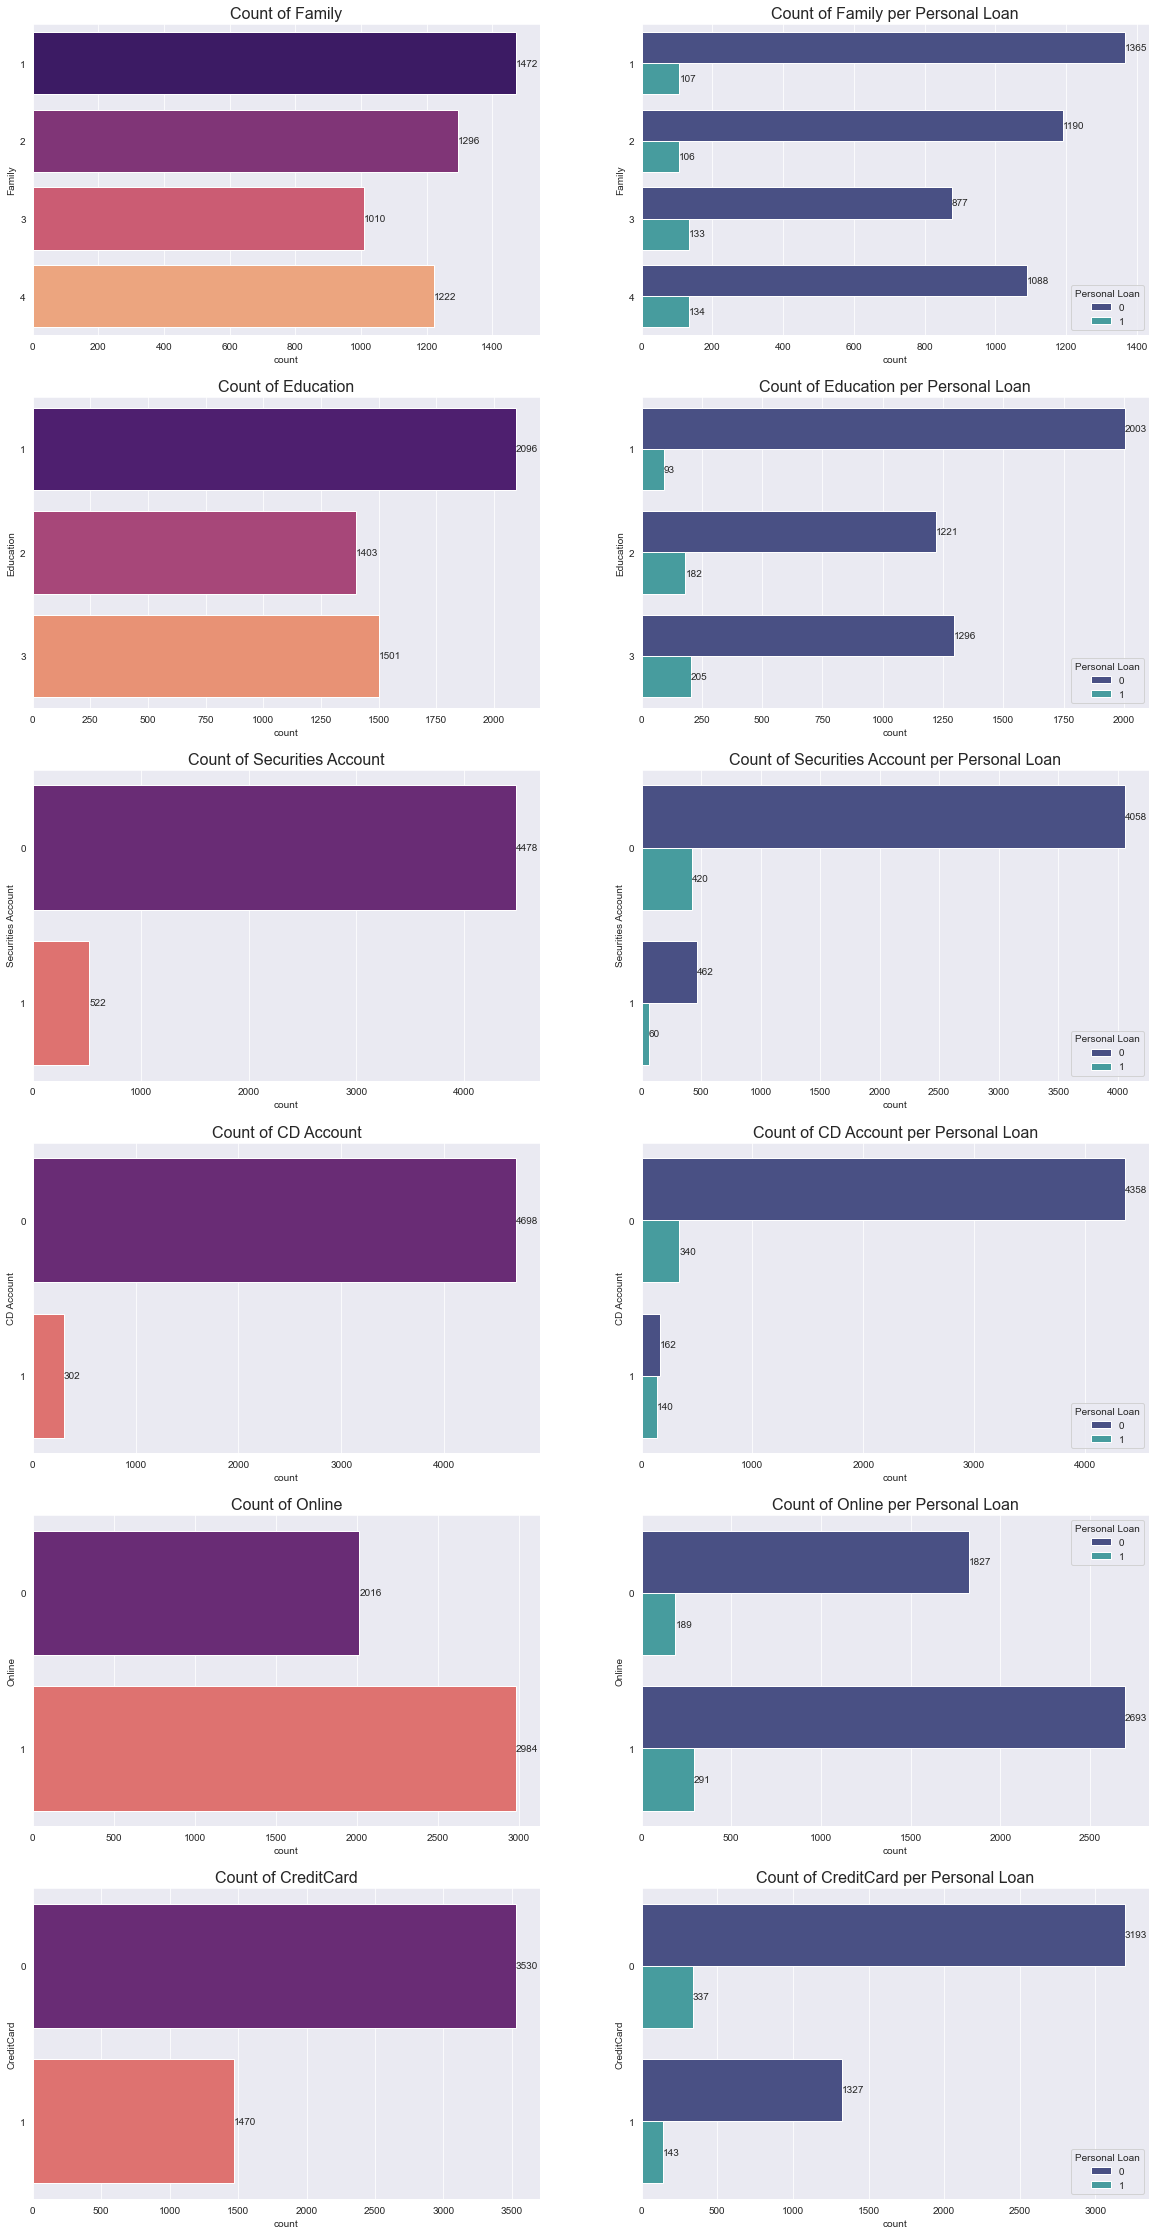

In [23]:
fig, axes = plt.subplots(6,2, figsize=(20,40))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=df, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=df, y=col, palette='mako', orient='h',  hue='Personal Loan',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Personal Loan', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

Observations:

Family:

The count of Families per personal loan shows that families with 4 people have the highest frequency of accepting the personal loan and families with 2 people have the lowest frequency of accepting the personal loan.
In addition, the count of the Family chart shows that families with one person have the highest frequency and families with 3 people have the lowest frequency.

Education:

The count of Education per personal loan shows that customers with (Advanced / Professional) education levels have the highest frequency of accepting personal loans and customers with (Undergrad) education levels have the lowest frequency of accepting personal loans.
In addition, the count of the Education chart shows that customers with (Undergrad) education levels have the highest frequency and customers with (Graduate) education levels have the lowest frequency.

Securities Accounts:

The count of Securities Accounts per personal loan shows that customers who don't have securities accounts with the bank have the highest frequency of accepting personal loans than those who have a securities account with the bank.
In addition, the count of the Securities Account chart shows that customers who don't have securities accounts with the bank have the highest frequency than those who have a securities account with the bank.


CD Accounts:

The count of CD Accounts per personal loan shows that customers who don't have a certificate of deposit (CD) account with the bank have the highest frequency of accepting personal loans than those who have a certificate of deposit (CD) account with the bank.
In addition, the count of the CD Account chart shows that customers who don't have a certificate of deposit (CD) account with the bank have the highest frequency than those who have a certificate of deposit (CD) account with the bank.

Online:

The count of Online per personal loan shows that customers who use internet banking facilities have the highest frequency of accepting personal loans than those who don't use internet banking facilities.
In addition, the count of the Online chart shows that customers who use internet banking facilities have the highest frequency than those who don't use internet banking facilities.

Credit card:

The count of Credit card per personal loan shows that customers who don't use a credit card issued by the Bank have the highest frequency of accepting personal loans than those who use a credit card issued by the Bank.
In addition, the count of Credit card chart shows that customers who don't use a credit card issued by the Bank have the highest frequency than those who use a credit card issued by the Bank.

In [24]:
cat_cols.describe()

Family    Education  Securities Account  CD Account       Online  \
count  5000.000000  5000.000000         5000.000000  5000.00000  5000.000000   
mean      2.396400     1.881000            0.104400     0.06040     0.596800   
std       1.147663     0.839869            0.305809     0.23825     0.490589   
min       1.000000     1.000000            0.000000     0.00000     0.000000   
25%       1.000000     1.000000            0.000000     0.00000     0.000000   
50%       2.000000     2.000000            0.000000     0.00000     1.000000   
75%       3.000000     3.000000            0.000000     0.00000     1.000000   
max       4.000000     3.000000            1.000000     1.00000     1.000000   

        CreditCard  
count  5000.000000  
mean      0.294000  
std       0.455637  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

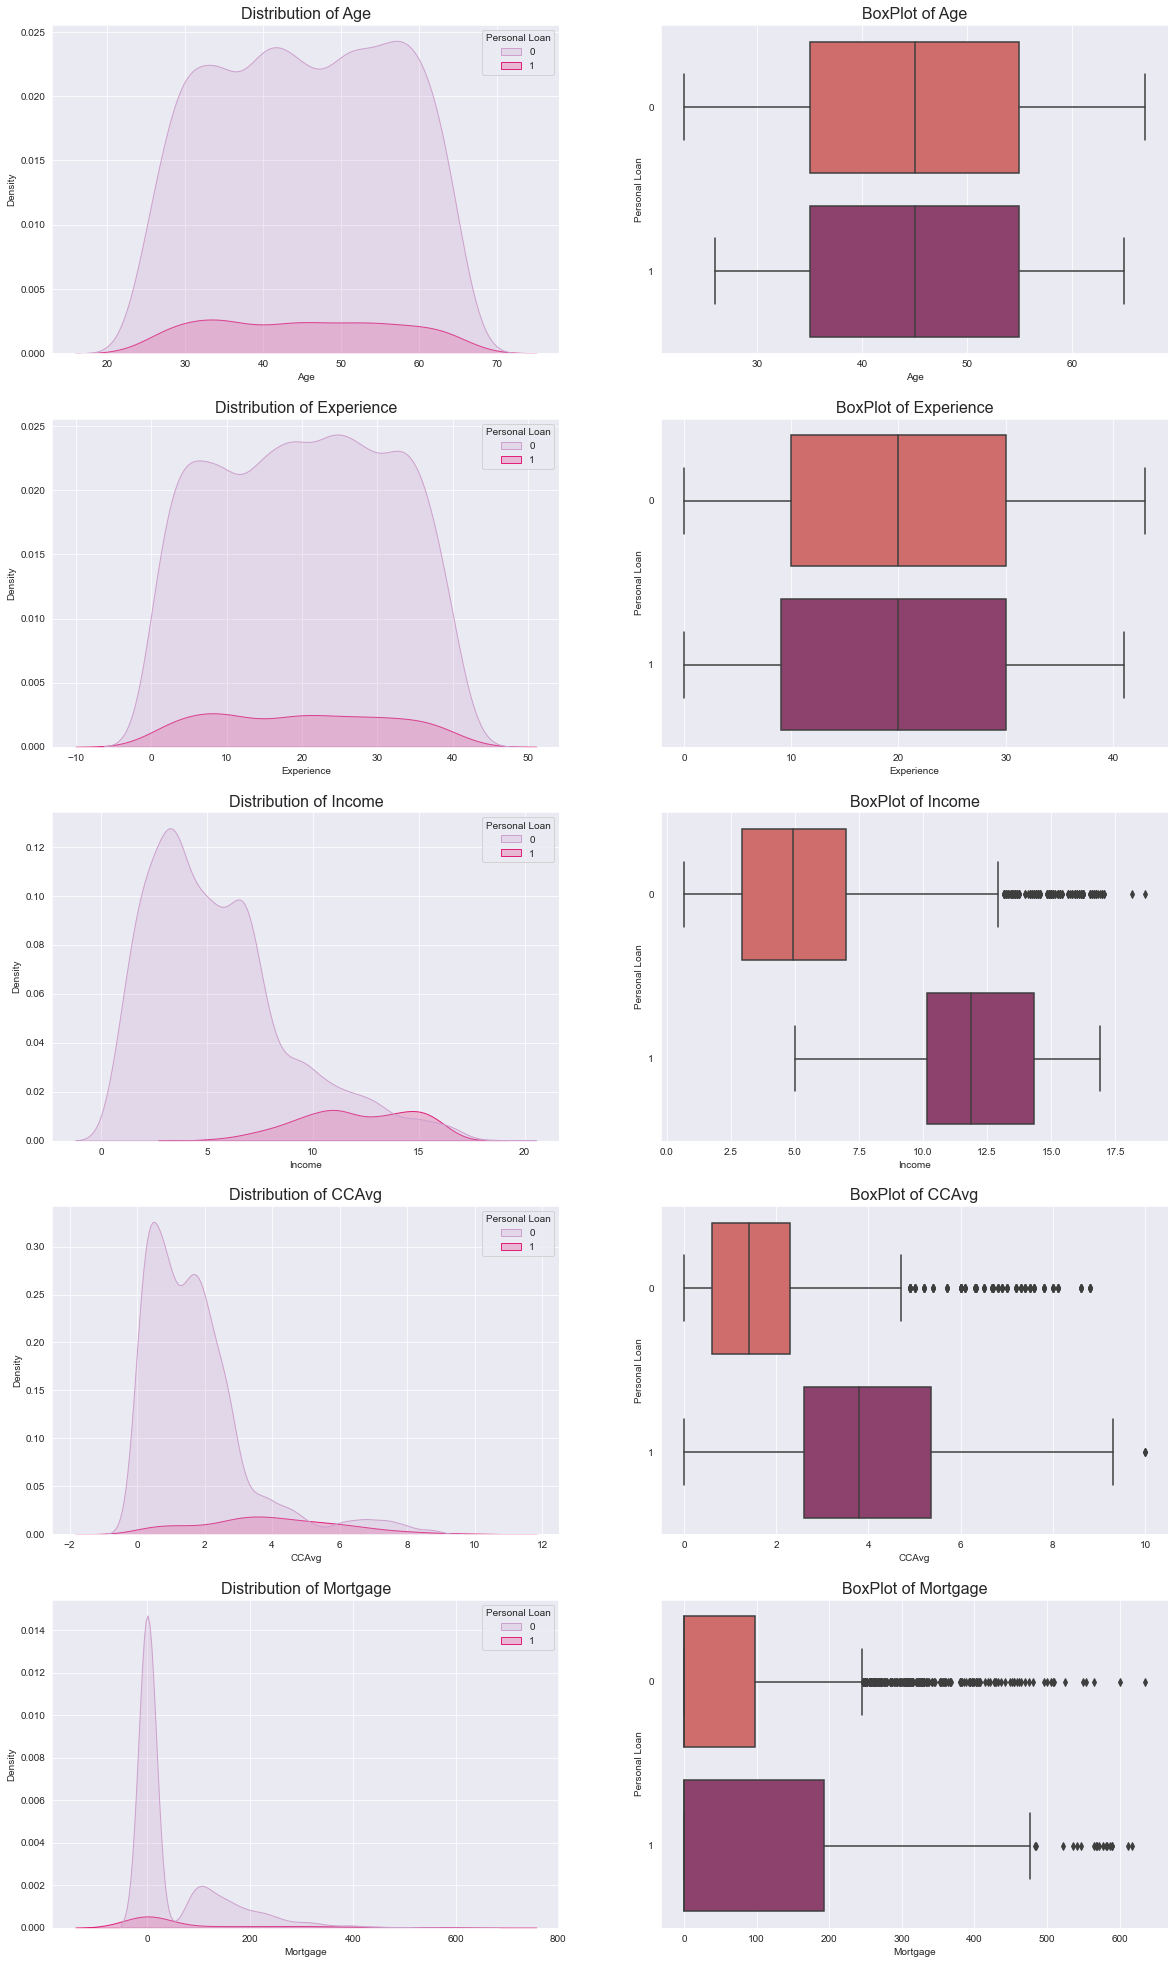

In [25]:
fig, axes = plt.subplots(5,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=df, x=col, palette='PuRd',fill=True , hue='Personal Loan', 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=df, x=col, palette='flare' , y='Personal Loan', orient='h', 
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

Observations:

A normal distribution (with no skewness) is observed in the features of Age and Experience for both customers who accept and do not accept the personal loan.

Income:

A positive and normal skewness is observed in the distribution of Income for customers who both don't accept and accept personal loans, respectively.

Moreover, customers with lower incomes don't accept the personal loan, while most customers with incomes ranging from 10 to 15 accept personal loan among the customers who accept the personal loan.

CCAvg:

A positive and normal skewness is observed in the distribution of CCAvg for customers who don't accept and accept personal loans, respectively.
Moreover, customers with a range of Avg. Spending on Credit Card per Month from 0-2, don't accept the personal loan.


Mortgage:

A positive skewness is observed in the distribution of Mortgage for both customers who accept and do not accept the personal loan.
Moreover, customers with zero Mortgages more than others don't accept personal loans.


In [26]:
df.groupby(df['Personal Loan']).mean().T

Personal Loan               0           1
Age                 45.367257   45.066667
Experience          20.165487   19.843750
Income               5.519827   12.062375
Family               2.373451    2.612500
CCAvg                1.729009    3.905354
Education            1.843584    2.233333
Mortgage            51.789381  100.845833
Securities Account   0.102212    0.125000
CD Account           0.035841    0.291667
Online               0.595796    0.606250
CreditCard           0.293584    0.297917

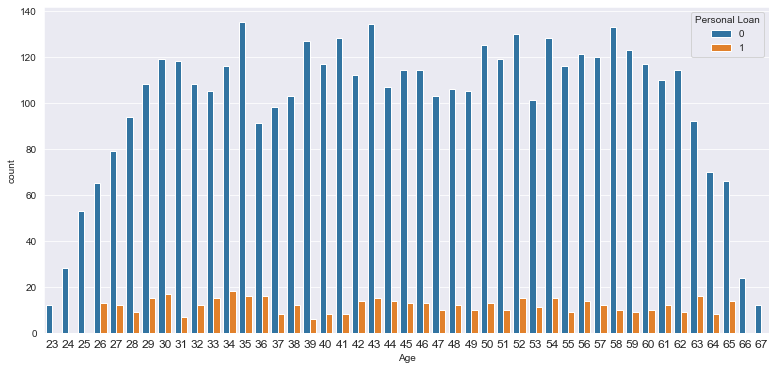

In [27]:
# Age based on Personal Loan
plt.figure(figsize = (13,6))
sns.countplot(data =df, x = df['Age'], hue ="Personal Loan") 
plt.xticks(fontsize=12)
plt.show()

Observation:

People with Age 26-65 accepts loan and 23,24,25,66,67 does not


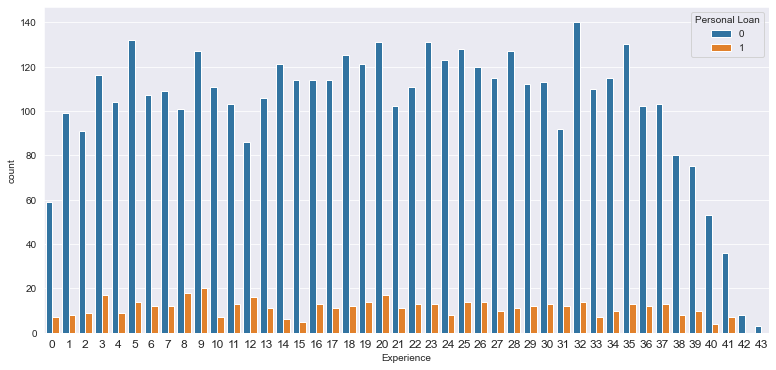

In [28]:
plt.figure(figsize = (13,6))
sns.countplot(data =df, x = df['Experience'], hue ="Personal Loan") 
plt.xticks(fontsize=12)
plt.show()

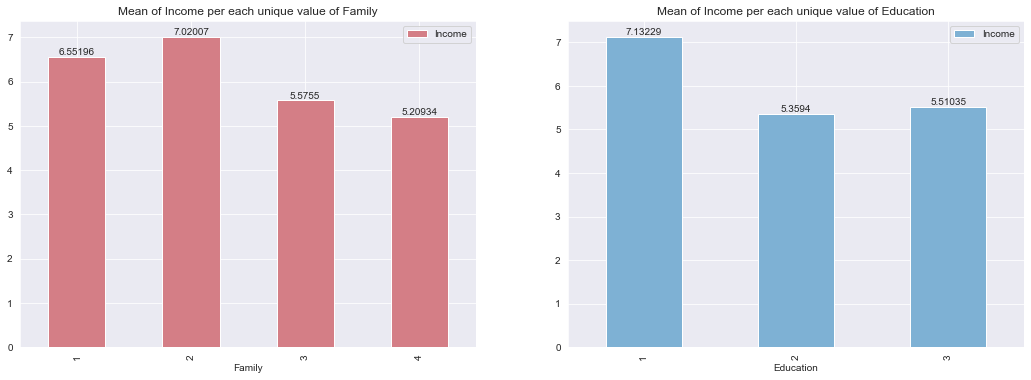

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Income','Family']].groupby(['Family']).mean().plot.bar(color='#d47e86',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Income per each unique value of Family')

ax2= df[['Income','Education']].groupby(['Education']).mean().plot.bar(color='#7eb1d4',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Income per each unique value of Education')

plt.show()

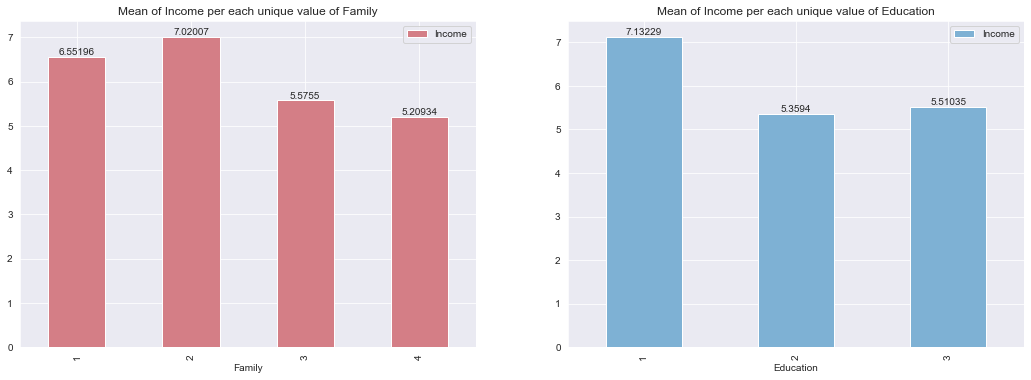

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Income','Family']].groupby(['Family']).mean().plot.bar(color='#d47e86',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Income per each unique value of Family')

ax2= df[['Income','Education']].groupby(['Education']).mean().plot.bar(color='#7eb1d4',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Income per each unique value of Education')

plt.show()

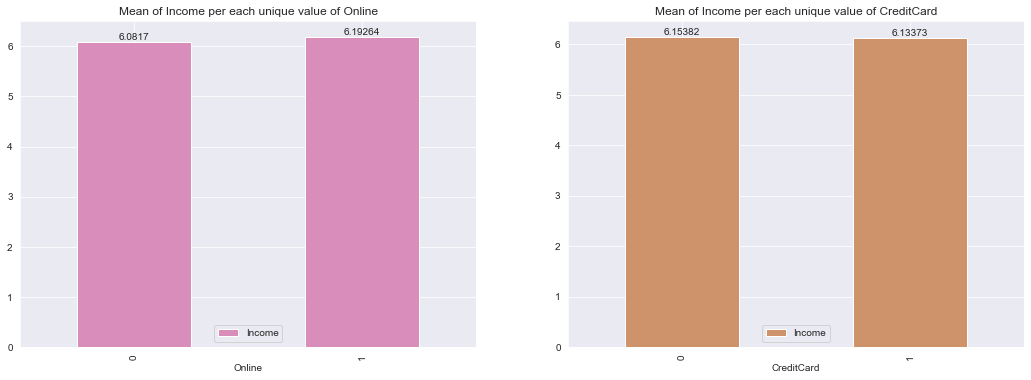

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Income','Online']].groupby(['Online']).mean().plot.bar(color='#d98dba',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Income per each unique value of Online')

ax2= df[['Income','CreditCard']].groupby(['CreditCard']).mean().plot.bar(color='#ce936b',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Income per each unique value of CreditCard')

plt.show()

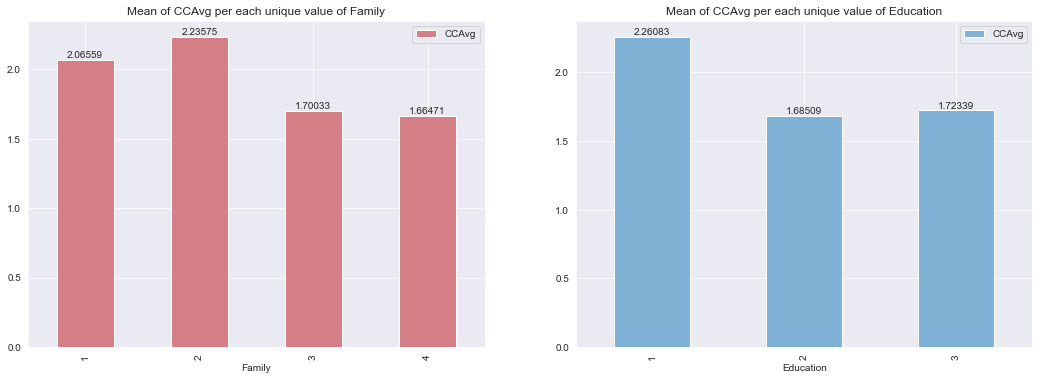

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['CCAvg','Family']].groupby(['Family']).mean().plot.bar(color='#d47e86',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of CCAvg per each unique value of Family')

ax2= df[['CCAvg','Education']].groupby(['Education']).mean().plot.bar(color='#7eb1d4',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of CCAvg per each unique value of Education')

plt.show()

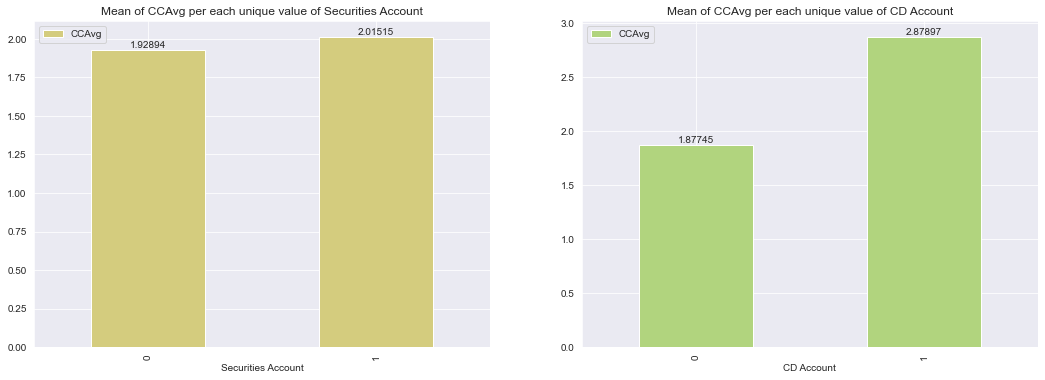

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['CCAvg','Securities Account']].groupby(['Securities Account']).mean().plot.bar(color='#d4cc7e',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of CCAvg per each unique value of Securities Account')

ax2= df[['CCAvg','CD Account']].groupby(['CD Account']).mean().plot.bar(color='#b1d47e',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of CCAvg per each unique value of CD Account')

plt.show()

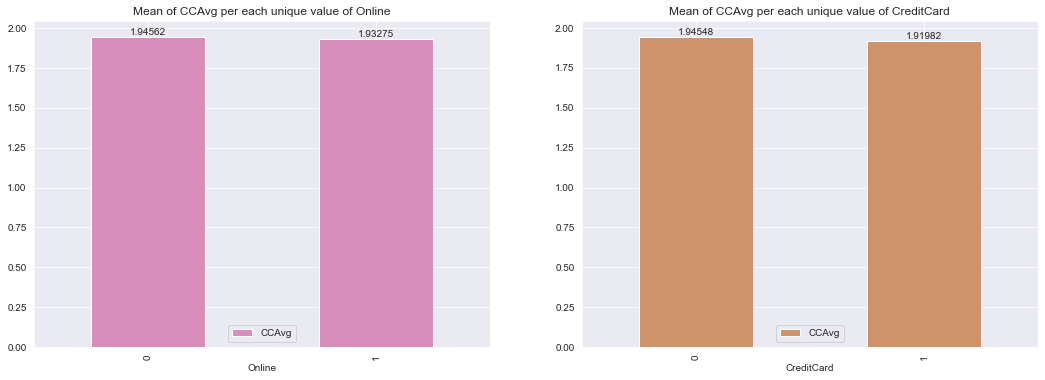

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['CCAvg','Online']].groupby(['Online']).mean().plot.bar(color='#d98dba',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of CCAvg per each unique value of Online')

ax2= df[['CCAvg','CreditCard']].groupby(['CreditCard']).mean().plot.bar(color='#ce936b',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of CCAvg per each unique value of CreditCard')

plt.show()

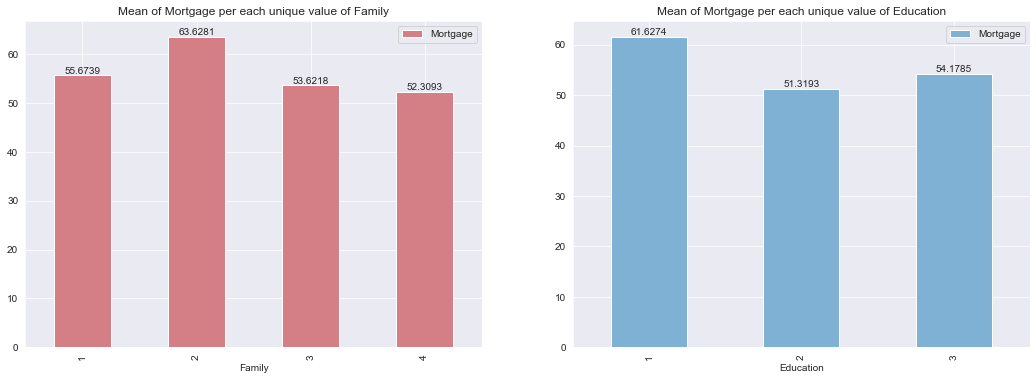

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Mortgage','Family']].groupby(['Family']).mean().plot.bar(color='#d47e86',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Mortgage per each unique value of Family')

ax2= df[['Mortgage','Education']].groupby(['Education']).mean().plot.bar(color='#7eb1d4',ax=ax[1])  
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Mortgage per each unique value of Education')

plt.show()

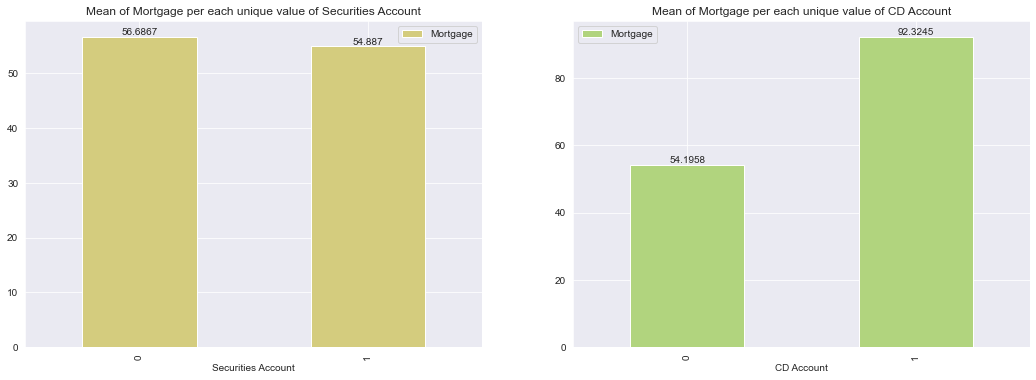

In [36]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Mortgage','Securities Account']].groupby(['Securities Account']).mean().plot.bar(color='#d4cc7e',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Mortgage per each unique value of Securities Account')

ax2= df[['Mortgage','CD Account']].groupby(['CD Account']).mean().plot.bar(color='#b1d47e',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Mortgage per each unique value of CD Account')

plt.show()

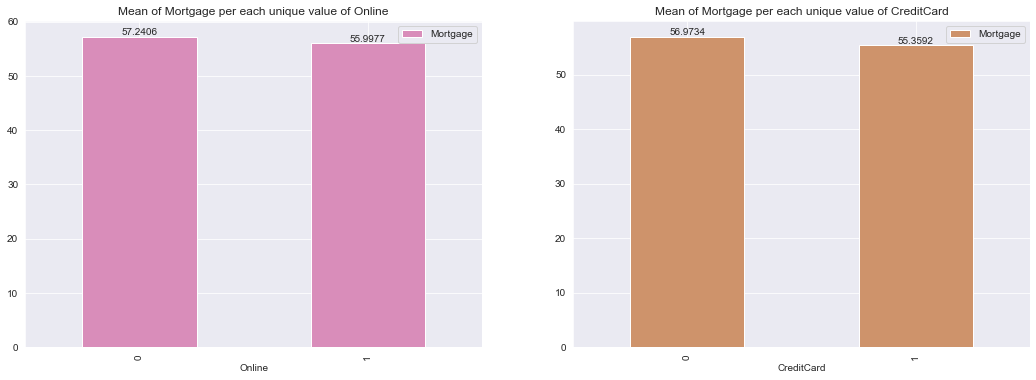

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,6))

ax1= df[['Mortgage','Online']].groupby(['Online']).mean().plot.bar(color='#d98dba',ax=ax[0]) 
for container in ax1.containers:
    ax1.bar_label(container)
ax[0].set_title('Mean of Mortgage per each unique value of Online')

ax2= df[['Mortgage','CreditCard']].groupby(['CreditCard']).mean().plot.bar(color='#ce936b',ax=ax[1]) 
for container in ax2.containers:
    ax2.bar_label(container)
ax[1].set_title('Mean of Mortgage per each unique value of CreditCard')

plt.show()

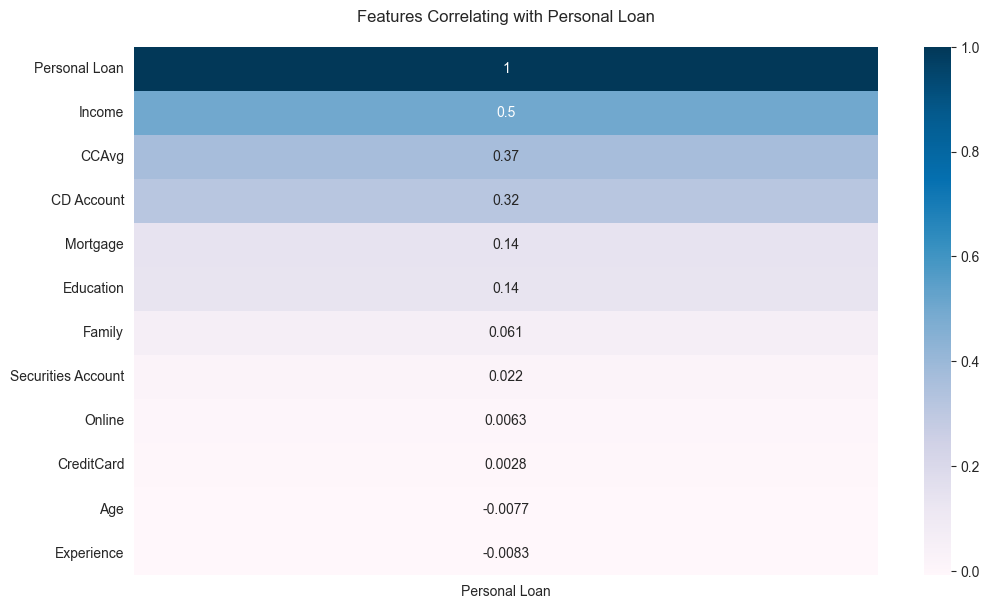

In [38]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (df.corr()[['Personal Loan']].sort_values (by = 'Personal Loan', ascending = False), annot = True, cmap = 'PuBu')
heatmap.set_title ('Features Correlating with Personal Loan', fontdict = {'fontsize':12}, pad = 18);

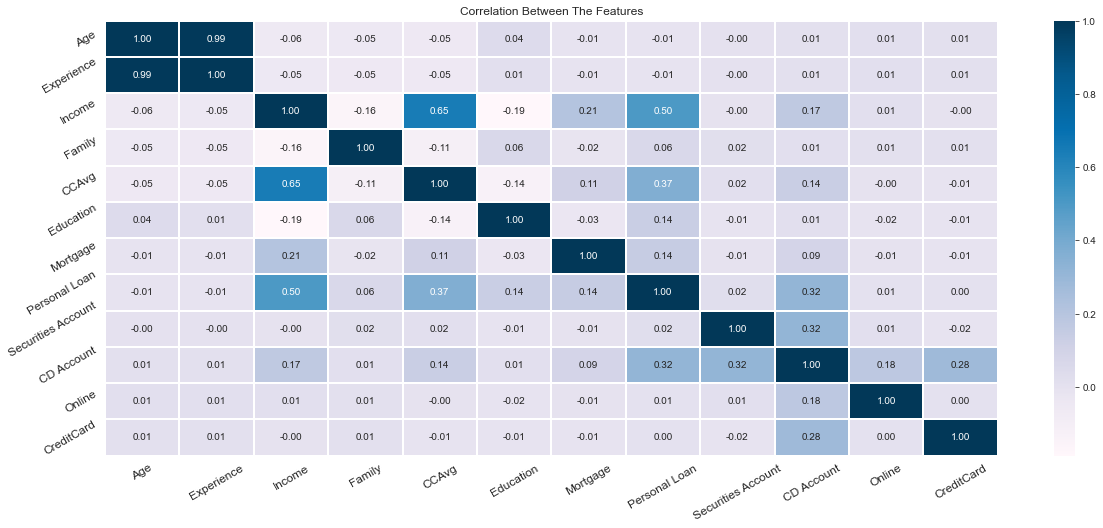

In [39]:
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(df.corr(), annot=True, cmap='PuBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=30, fontsize=12)
a.set_yticklabels(a.get_yticklabels(), rotation=30, fontsize=12)
plt.show()

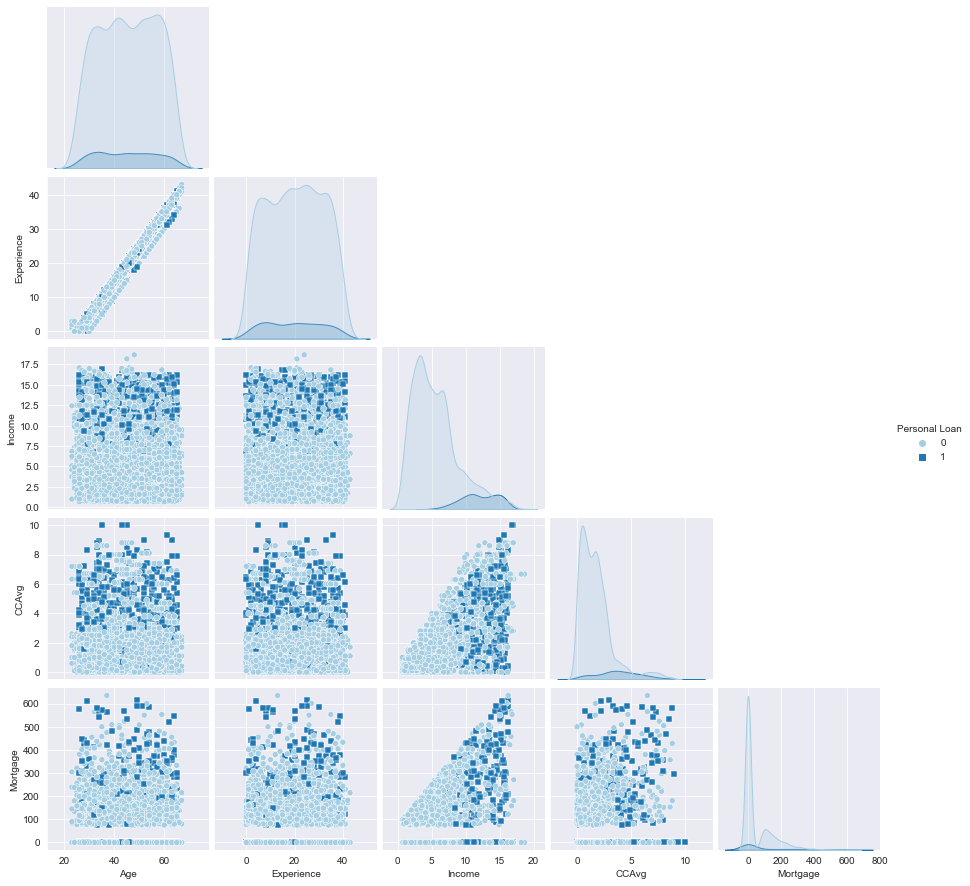

In [40]:
# Pairplot based on Personal Loan
sns.set_palette(sns.color_palette("Paired", 8))  
sns.pairplot(df, x_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
                 y_vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
                 hue='Personal Loan', markers=["o", "s"], corner=True)   
plt.show()

Model Building

In [41]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [42]:
X.shape

(5000, 11)

In [43]:
y.shape

(5000,)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
# Array of test size value from 0.2 to 0.3
test_size = [0.2,0.25,0.3]

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=0)
    model = LogisticRegression ()
    model.fit (X_train1, y_train1)
    score.append (model.score (X_test1, y_test1))
    
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r

Test size     Score
0       0.20  0.953000
1       0.25  0.953600
2       0.30  0.950667

In [46]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0) #0.2 is considered

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [48]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train1 = scaler.fit_transform(X_train1)

# Transform the test data using the same scaler
X_test1 = scaler.transform(X_test1)

In [49]:
# Instantiate the model
logistic_model = LogisticRegression(max_iter = 1000)

# Fit the model to the training set
logistic_model.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

In [50]:
y_pred = logistic_model.predict(X_test1)

In [51]:
# Scores on training and test set
print('Training set score: {:.4f}'.format(logistic_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(logistic_model.score(X_test1, y_test1)))

Training set score: 0.9525
Test set score: 0.9520


No issue of overfitting

In [52]:
# Check Personal Loan distribution in test set
s = pd.Series(y_test1)
s.value_counts()

0    904
1     96
Name: Personal Loan, dtype: int64

Our model is working good, as null accuracy is 0.904

In [53]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=False)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [55]:
# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

In [56]:
score = cross_val_score(logistic_model, X_train1, y_train1)
logistic_model_cv_score = score.mean()
logistic_model_cv_stdev = score.std()
print('Cross Validation scores are:\n {}'.format(score))

Cross Validation scores are:
 [0.95    0.94875 0.95    0.94875 0.955  ]


In [57]:
cm = confusion_matrix(y_test1,y_pred)   # that is actual vs predicted
cm

array([[892,  12],
       [ 36,  60]], dtype=int64)

Text(160.0, 0.5, 'Actual')

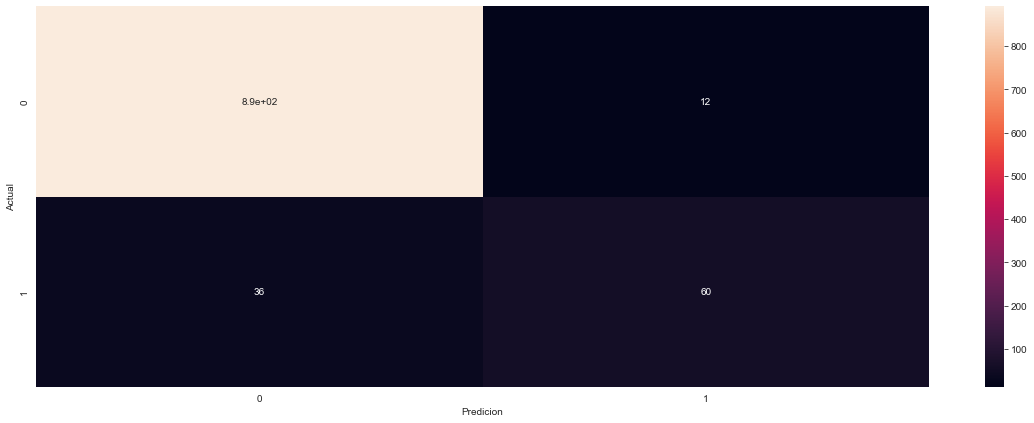

In [58]:
plt.figure(figsize=(20,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicion")
plt.ylabel("Actual")

In [59]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [60]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [61]:
Baselog_result = metrics_calculator(y_test1, y_pred, 'Base Logistic')
Baselog_result

Base Logistic
Accuracy        0.952000
Precision       0.897270
Recall          0.805863
F1-score        0.844042

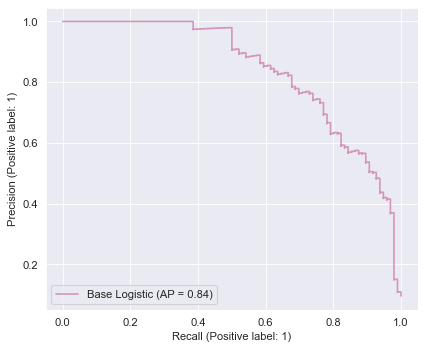

In [62]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(logistic_model, X_test1, y_test1, ax=ax, name='Base Logistic', color='#d397bc')
plt.show()

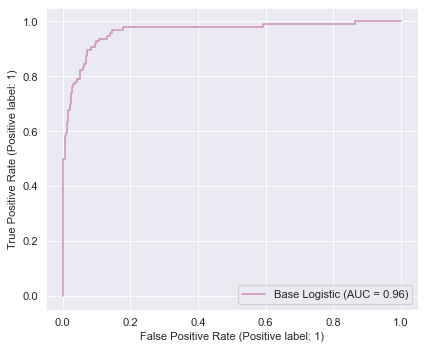

In [63]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(logistic_model, X_test1, y_test1, ax=ax, name='Base Logistic', color='#d397bc')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

# KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

In [65]:

# Finding optimal hyperparameters(GridSearchCV)

# Define model
model = LogisticRegression()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['max_iter'] = [100, 500, 1000]
space['multi_class'] = ['auto', 'ovr', 'multinomial']

# Define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
GridSearchCV = search.fit(X_train1, y_train1)

# Set the clf to the best combination of parameters
logistic_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

Best Score: 0.9517499999999998
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


In [66]:
logistic_modelcv.fit(X_train1, y_train1)

LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')

In [67]:
y_pred = logistic_modelcv.predict(X_test1)

In [68]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.9520


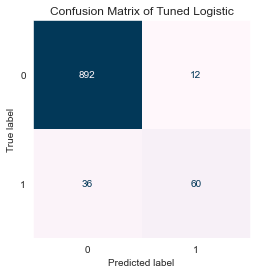

In [69]:
ConfusionMatrixDisplay.from_estimator(logistic_modelcv, X_test1, y_test1, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Tuned Logistic')
plt.grid(False)



In [70]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.62      0.71        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [71]:
Finallog_result = metrics_calculator(y_test1, y_pred, 'Tuned Logistic')
Finallog_result

Tuned Logistic
Accuracy         0.952000
Precision        0.897270
Recall           0.805863
F1-score         0.844042

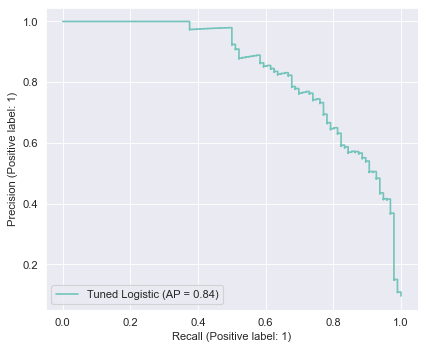

In [72]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(logistic_modelcv, X_test1, y_test1, ax=ax, name='Tuned Logistic', color='#73c4ba')
plt.show()

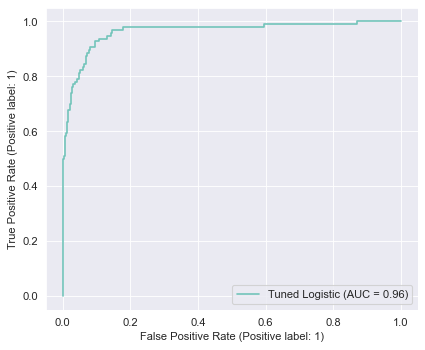

In [73]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(logistic_modelcv, X_test1, y_test1, ax=ax, name='Tuned Logistic', color='#73c4ba')
plt.show()

Predicting new sampling

In [74]:
df1 = df.copy()

In [75]:
df2 = pd.DataFrame ({"Age" : [42], "Experience" : [16], "Income" : [2.5], "Family" : [3],
                    "CCAvg" : [1.2], "Education" : [3], "Mortgage" : [0],"Personal Loan" : [1],
                    "Securities Account" : [1], "CD Account" : [0], "Online" : [1], "CreditCard" : [1]})

In [76]:
Df = pd.concat([df1, df2])
Df.reset_index(drop=True, inplace=True) 
Df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   
5000   42          16    2.50       3    1.2          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  
5000              1                   1           0       1           1  

[5001 rows x 12 columns]

In [77]:
X_train_sample1 = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                      "Securities Account", "CD Account", "Online", "CreditCard"]][:5000]
y_train_sample1 = Df ["Personal Loan"][:5000].ravel()

In [78]:
X_test_sample1 = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                     "Securities Account", "CD Account", "Online", "CreditCard"]][5000:]
X_test_sample1

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
5000   42          16     2.5       3    1.2          3         0   

      Securities Account  CD Account  Online  CreditCard  
5000                   1           0       1           1

In [79]:
logreg_sample = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')  
logreg_sample.fit (X_train_sample1, y_train_sample1)

LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')

In [80]:
y_pred_sample1 = logreg_sample.predict (X_test_sample1)

In [81]:
print ("Personal Loan Result:", y_pred_sample1)

Personal Loan Result: [0]


In [82]:
df3 = df.copy()

In [83]:
# Age
bin_Age = [0, 29, 39, 49, 59, 70]
category_Age = ['<30s', '30s', '40s', '50s', '>50s']
df3['Age_cat'] = pd.cut(df3['Age'], bins=bin_Age, labels=category_Age)

In [84]:
# Experience
bin_Experience = [-1, 9, 19, 29, 39, 50]
category_Experience = ['<10s', '10s', '20s', '30s', '>30s']
df3['Experience_cat'] = pd.cut(df3['Experience'], bins=bin_Experience, labels=category_Experience)

In [85]:
# Income
bin_Income = [0, 4, 9, 14, 20]
category_Income = ['<5s', '5s', '10s', '10>s']
df3['Income_cat'] = pd.cut(df3['Income'], bins=bin_Income, labels=category_Income)

In [86]:
# CCAvg
bin_CCAvg = [-1, 1, 3, 5, 7, 10]
category_CCAvg = ['<2s', '2s', '4s', '6s', '>6s']
df3['CCAvg_cat'] = pd.cut(df3['CCAvg'], bins=bin_CCAvg, labels=category_CCAvg)

In [87]:
# Mortgage
bin_Mortgage = [-1, 49, 99, 149, 199, 249, 299, 349, 399, 700]
category_Mortgage = ['<50s', '50s', '100s', '150s', '200s', '250s', '300s', '350s', '>350']
df3['Mortgage_cat'] = pd.cut(df3['Mortgage'], bins=bin_Mortgage, labels=category_Mortgage)

In [88]:
df3.shape

(5000, 17)

In [89]:
# Dropping extra features 
df3 = df3.drop(['Age'], axis = 1)
df3 = df3.drop(['Experience'], axis = 1)
df3 = df3.drop(['Income'], axis = 1)
df3 = df3.drop(['CCAvg'], axis = 1)
df3 = df3.drop(['Mortgage'], axis = 1)
df3.shape

(5000, 12)

In [90]:
df3[df3.select_dtypes('int64').columns] = df3.select_dtypes('int64').astype('category')

In [91]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Family              5000 non-null   category
 1   Education           5000 non-null   category
 2   Personal Loan       5000 non-null   category
 3   Securities Account  5000 non-null   category
 4   CD Account          5000 non-null   category
 5   Online              5000 non-null   category
 6   CreditCard          5000 non-null   category
 7   Age_cat             5000 non-null   category
 8   Experience_cat      5000 non-null   category
 9   Income_cat          5000 non-null   category
 10  CCAvg_cat           5000 non-null   category
 11  Mortgage_cat        5000 non-null   category
dtypes: category(12)
memory usage: 60.8 KB


In [92]:
df3.isna().sum().to_frame()

0
Family              0
Education           0
Personal Loan       0
Securities Account  0
CD Account          0
Online              0
CreditCard          0
Age_cat             0
Experience_cat      0
Income_cat          0
CCAvg_cat           0
Mortgage_cat        0

In [93]:
df4 = pd.get_dummies(df3.drop('Personal Loan', axis=1))
df4.insert(0, 'Personal Loan', df3['Personal Loan'])
df4 = df4.astype('int64')
df4

Personal Loan  Family_1  Family_2  Family_3  Family_4  Education_1  \
0                 0         0         0         0         1            1   
1                 0         0         0         1         0            1   
2                 0         1         0         0         0            1   
3                 0         1         0         0         0            0   
4                 0         0         0         0         1            0   
...             ...       ...       ...       ...       ...          ...   
4995              0         1         0         0         0            0   
4996              0         0         0         0         1            1   
4997              0         0         1         0         0            0   
4998              0         0         0         1         0            0   
4999              0         0         0         1         0            1   

      Education_2  Education_3  Securities Account_0  Securities Account_1  \
0               0            0                     0                     1   
1               0            0                     0                     1   
2               0            0                     1                     0   
3               1            0                     1                     0   
4               1            0                     1                     0   
...           ...          ...                   ...                   ...   
4995            0            1                     1                     0   
4996            0            0                     1                     0   
4997            0            1                     1                     0   
4998            1            0                     1                     0   
4999            0            0                     1                     0   

      ...  CCAvg_cat_>6s  Mortgage_cat_<50s  Mortgage_cat_50s  \
0     ...              0                  1                 0   
1     ...              0                  1                 0   
2     ...              0                  1                 0   
3     ...              0                  1                 0   
4     ...              0                  1                 0   
...   ...            ...                ...               ...   
4995  ...              0                  1                 0   
4996  ...              0                  0                 1   
4997  ...              0                  1                 0   
4998  ...              0                  1                 0   
4999  ...              0                  1                 0   

      Mortgage_cat_100s  Mortgage_cat_150s  Mortgage_cat_200s  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
4995                  0                  0                  0   
4996                  0                  0                  0   
4997                  0                  0                  0   
4998                  0                  0                  0   
4999                  0                  0                  0   

      Mortgage_cat_250s  Mortgage_cat_300s  Mortgage_cat_350s  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
4995                  0                  0                  0   
4996                  0                  0                  0   
4997     

In [94]:
X = df4.drop('Personal Loan', axis=1)
y = df4['Personal Loan'].ravel()

In [95]:
print ('X:', X.shape, '\ny:', y.shape)

X: (5000, 43) 
y: (5000,)


In [96]:
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [97]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train2, X_test2, y_train2, y_test2 = train_test_split (X, y, test_size=size, random_state=0)
    clf = ComplementNB ()
    clf.fit (X_train2, y_train2)
    score.append (clf.score (X_test2, y_test2))
    
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r

Test size   Score
0       0.20  0.8820
1       0.25  0.8816
2       0.30  0.8760

In [98]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)

In [99]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train2 = scaler.fit_transform(X_train2)

# Transform the test data using the same scaler
X_test2 = scaler.transform(X_test2)

In [100]:
CNBmodel = ComplementNB()
CNBmodel.fit(X_train2, y_train2)

ComplementNB()

In [101]:
y_pred = CNBmodel.predict(X_test2)

In [102]:
print('Model Accuracy Score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred)))

Model Accuracy Score: 0.8710


In [103]:
print('Training set score: {:.4f}'.format(CNBmodel.score(X_train2, y_train2)))
print('Test set score: {:.4f}'.format(CNBmodel.score(X_test2, y_test2)))

Training set score: 0.8722
Test set score: 0.8710


No issue of overfitting here as well

In [104]:
kf = KFold(n_splits=10, shuffle=False)

In [105]:
score = cross_val_score(CNBmodel, X_train2, y_train2, cv=kf, scoring='recall')
CNBmodel_cv_score = score.mean()
CNBmodel_cv_stdev = stdev(score)
print('Cross Validation Recall scores are:\n {}'.format(score))

Cross Validation Recall scores are:
 [0.94871795 0.94285714 0.97368421 0.88571429 0.82608696 0.86666667
 0.93939394 0.86842105 0.9047619  0.93939394]


In [106]:
Recall = ['Cross Validation Recall']
CNB_R = pd.DataFrame({'CV Mean':CNBmodel_cv_score,'Std':CNBmodel_cv_stdev},index=Recall)
CNB_R

CV Mean       Std
Cross Validation Recall  0.90957  0.046697

In [107]:
score = cross_val_score(CNBmodel, X_train2, y_train2, cv=kf, scoring='accuracy')
CNBmodel_cv_score1 = score.mean()
CNBmodel_cv_stdev1 = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.885  0.855  0.91   0.8625 0.855  0.8575 0.8825 0.88   0.87   0.855 ]


In [108]:
Accuracy = ['Cross Validation Accuracy']
CNB_A = pd.DataFrame({'CV Mean':CNBmodel_cv_score1,'Std':CNBmodel_cv_stdev1},index=Accuracy)
CNB_A

CV Mean       Std
Cross Validation Accuracy  0.87125  0.018114

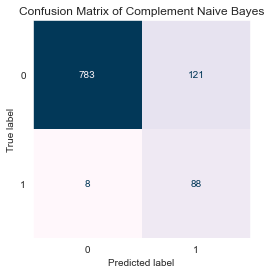

In [109]:
ConfusionMatrixDisplay.from_estimator(CNBmodel, X_test2, y_test2, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Complement Naive Bayes')
plt.grid(False)

In [110]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       904
           1       0.42      0.92      0.58        96

    accuracy                           0.87      1000
   macro avg       0.71      0.89      0.75      1000
weighted avg       0.94      0.87      0.89      1000



In [111]:
CNB_result = metrics_calculator(y_test2, y_pred, 'Complement Naive Bayes')
CNB_result

Complement Naive Bayes
Accuracy                 0.871000
Precision                0.705469
Recall                   0.891409
F1-score                 0.750471

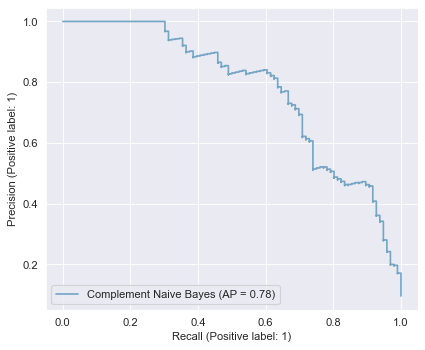

In [112]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(CNBmodel, X_test2, y_test2, ax=ax, name='Complement Naive Bayes', color='#73a5c4')
plt.show()

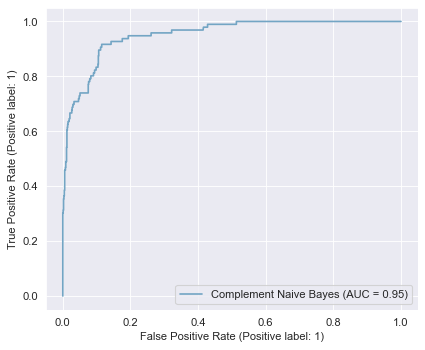

In [113]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(CNBmodel, X_test2, y_test2, ax=ax, name='Complement Naive Bayes', color='#73a5c4')
plt.show()

KNN is simple and effective algorithm to work on

In [114]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [115]:
print ('X:', X.shape, '\ny:', y.shape)

X: (5000, 11) 
y: (5000,)


In [116]:
from sklearn.neighbors import KNeighborsClassifier

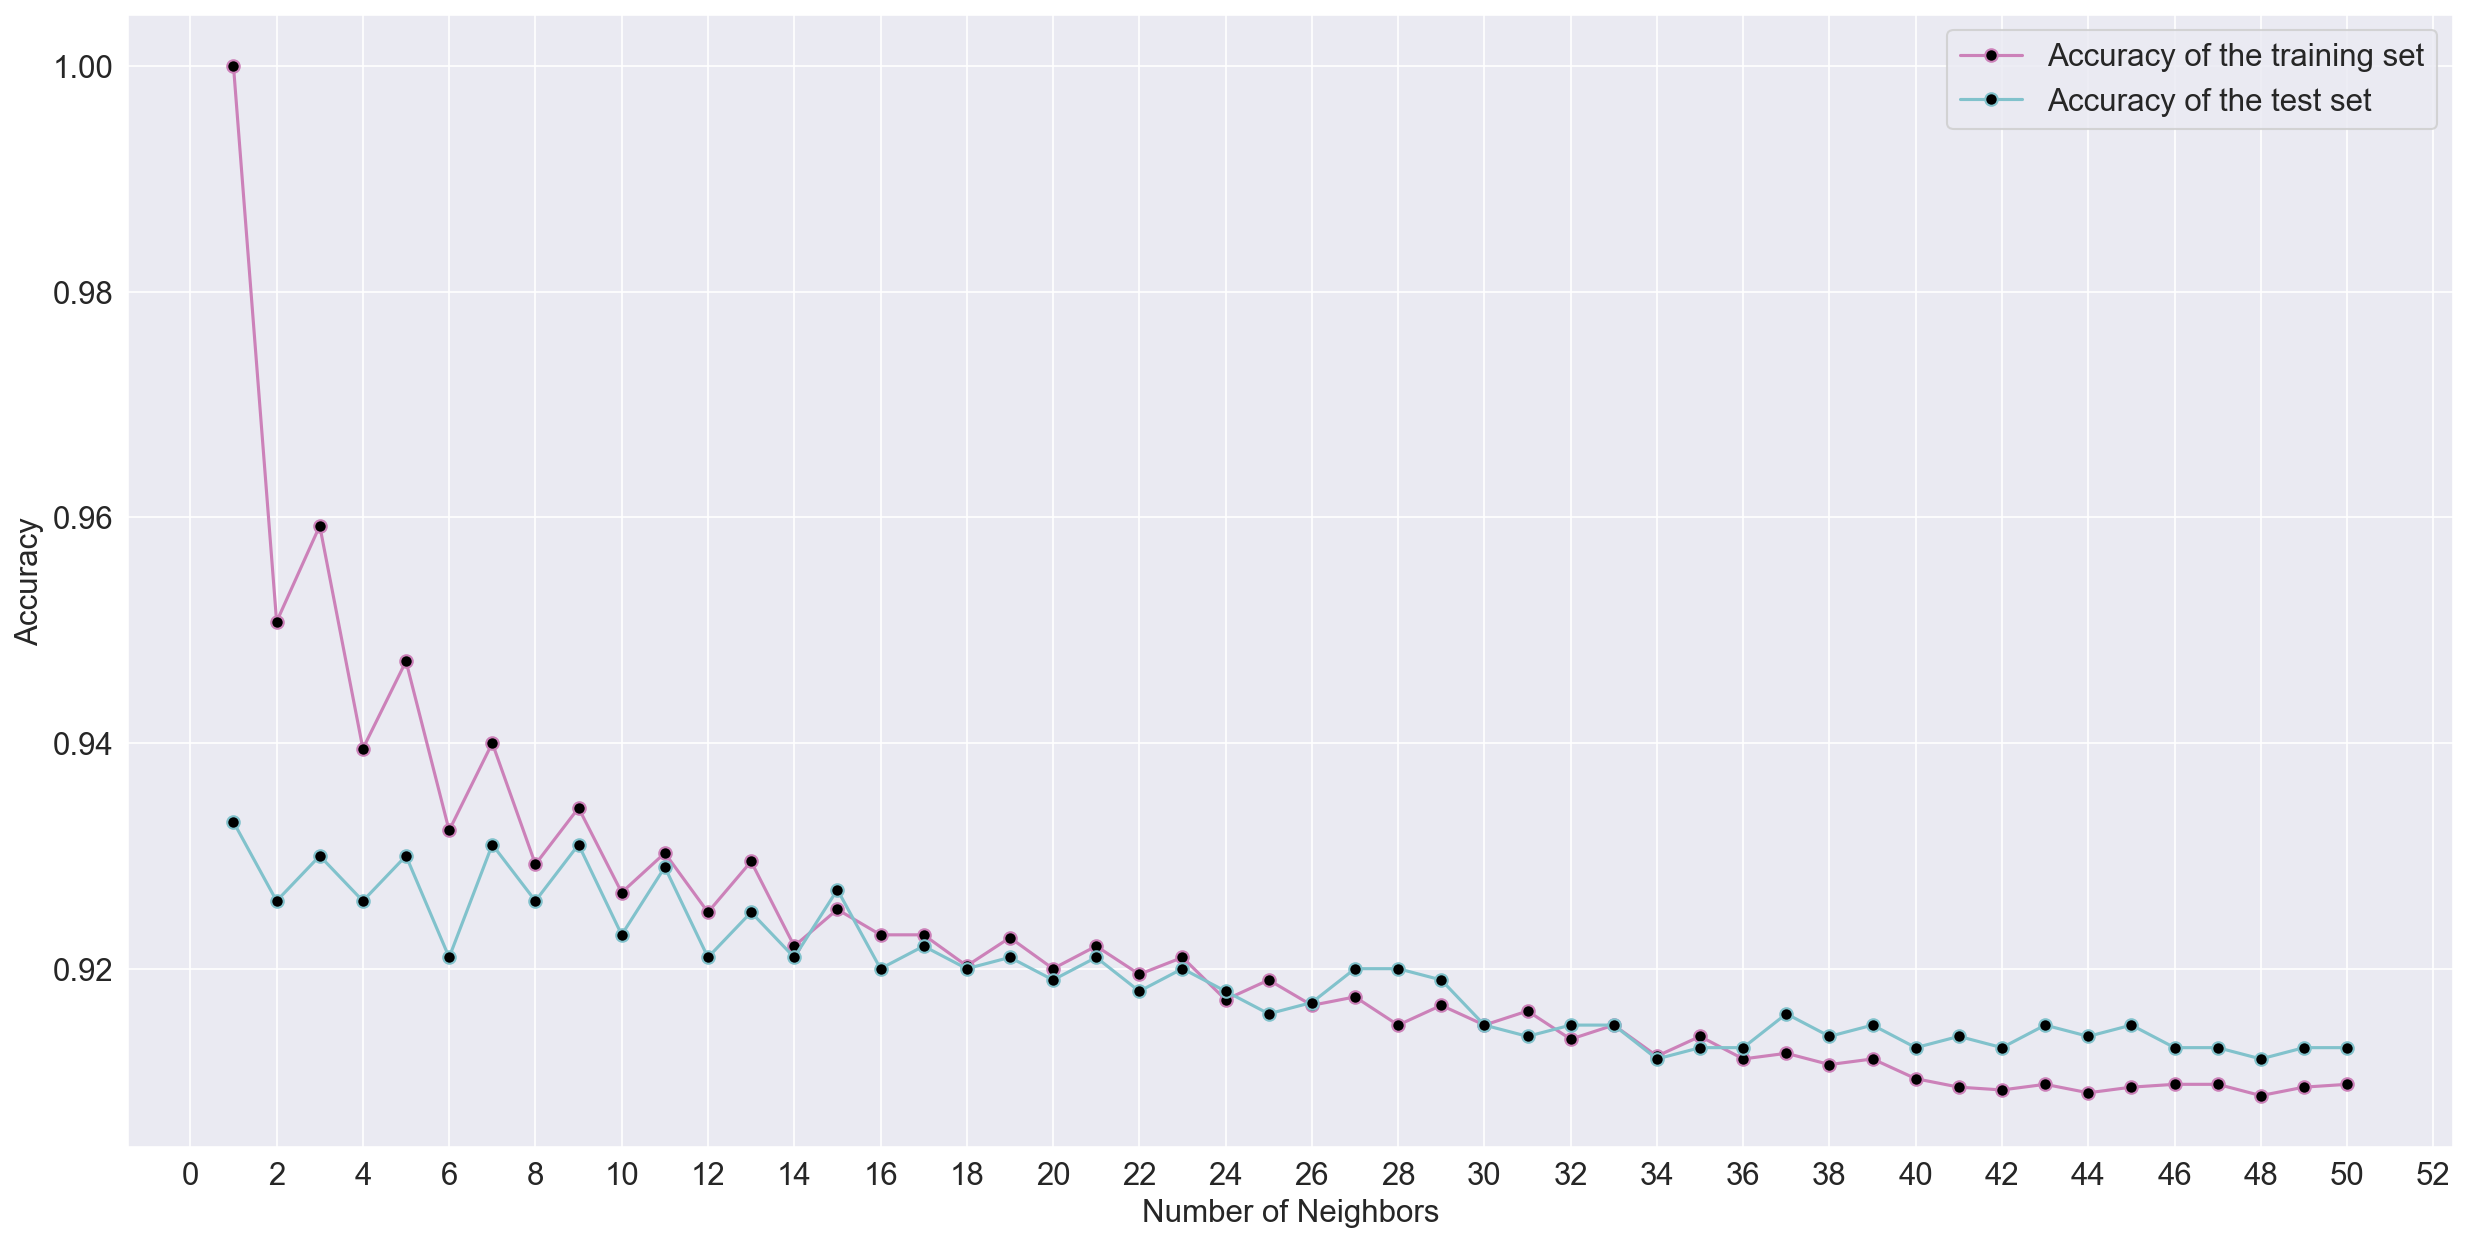

In [117]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=0)

training_accuracy = [KNeighborsClassifier(n_neighbors=i).fit(X_train3, y_train3).score(X_train3, y_train3) for i in range(1, 51)]
test_accuracy = [KNeighborsClassifier(n_neighbors=i).fit(X_train3, y_train3).score(X_test3, y_test3) for i in range(1, 51)]

plt.figure(figsize=(20, 10), dpi=150)
plt.xticks(range(0, 55, 2), fontsize=15)
plt.yticks(fontsize=15)

plt.plot(range(1, 51), training_accuracy, label="Accuracy of the training set", color='#cc81b9', 
                       marker='o', markerfacecolor='black', markersize=6)
plt.plot(range(1, 51), test_accuracy, label="Accuracy of the test set", color='#81c2cc', 
                       marker='o', markerfacecolor='black', markersize=6)

plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Number of Neighbors", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [118]:
max_neighbors = 50
accuracy = np.zeros(max_neighbors)

for i in range(2, max_neighbors+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train3, y_train3)
    y_pred = knn.predict(X_test3)
    accuracy[i-1] = metrics.accuracy_score(y_test3, y_pred)

best_accuracy = np.max(accuracy)
best_k = np.argmax(accuracy) + 1

print(f"Accuracy scores:\n{accuracy}")
print(f"\nBest accuracy: {best_accuracy:.3f} for k = {best_k}")

Accuracy scores:
[0.    0.926 0.93  0.926 0.93  0.921 0.931 0.926 0.931 0.923 0.929 0.921
 0.925 0.921 0.927 0.92  0.922 0.92  0.921 0.919 0.921 0.918 0.92  0.918
 0.916 0.917 0.92  0.92  0.919 0.915 0.914 0.915 0.915 0.912 0.913 0.913
 0.916 0.914 0.915 0.913 0.914 0.913 0.915 0.914 0.915 0.913 0.913 0.912
 0.913 0.913]

Best accuracy: 0.931 for k = 7


In [119]:
K = best_k

# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

#Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, test_size=size, random_state=0)
    Knn = KNeighborsClassifier (n_neighbors = K)
    Knn.fit (X_train3, y_train3)
    score.append (Knn.score (X_test3, y_test3))
    
r= pd.DataFrame({'Test size': test_size, 'Score': score})
r

Test size     Score
0       0.20  0.931000
1       0.25  0.932800
2       0.30  0.932667

In [120]:
X_train3, X_test3, y_train3, y_test3 = train_test_split (X, y, stratify=y, test_size = 0.25 , random_state = 0)

In [121]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train3 = scaler.fit_transform(X_train3)

# Transform the test data using the same scaler
X_test3 = scaler.transform(X_test3)

In [122]:
knn_model = KNeighborsClassifier(n_neighbors = best_k)
knn_model.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=7)

In [123]:
y_pred = knn_model.predict(X_test3)

In [124]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Model accuracy score: 0.9512


In [125]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn_model.score(X_train3, y_train3)))
print('Test set score: {:.4f}'.format(knn_model.score(X_test3, y_test3)))


Training set score: 0.9645
Test set score: 0.9512


No issue of over-fitting again

In [126]:
y_test3.shape

(1250,)

In [127]:
# Check Personal Loan distribution in test set
s = pd.Series(y_test3)
s.value_counts()

0    1130
1     120
dtype: int64

In [128]:
# Check null accuracy score
null_accuracy = (1130/(1130+120))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9040


All set, no issue with null accuracy as well.

In [129]:
kf = KFold(n_splits=10, shuffle=False)

In [130]:
score = cross_val_score(knn_model, X_train3, y_train3, cv=kf, scoring='recall')
knn_model_cv_score = score.mean()
knn_model_cv_stdev = stdev(score)
print('Cross Validation Recall scores are:\n {}'.format(score))

Cross Validation Recall scores are:
 [0.42105263 0.75       0.56       0.60869565 0.66666667 0.5
 0.47058824 0.37142857 0.64705882 0.77777778]


In [131]:
Recall = ['Cross Validation Recall']
knn_R = pd.DataFrame({'CV Mean':knn_model_cv_score,'Std':knn_model_cv_stdev},index=Recall)
knn_R

CV Mean       Std
Cross Validation Recall  0.577327  0.136753

In [132]:
score = cross_val_score(knn_model, X_train3, y_train3, cv=kf, scoring='accuracy')
knn_model_cv_score1 = score.mean()
knn_model_cv_stdev1 = stdev(score)
print('Cross Validation Accuracy scores are:\n {}'.format(score))

Cross Validation Accuracy scores are:
 [0.94133333 0.97066667 0.96266667 0.94933333 0.95733333 0.95466667
 0.94666667 0.93866667 0.96266667 0.97066667]


In [133]:
Accuracy  = ['Cross Validation Accuracy ']
knn_A = pd.DataFrame({'CV Mean':knn_model_cv_score1,'Std':knn_model_cv_stdev1},index=Accuracy )
knn_A

CV Mean       Std
Cross Validation Accuracy   0.955467  0.011387

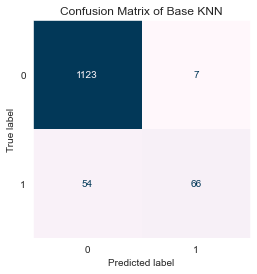

In [134]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test3, y_test3, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Base KNN')
plt.grid(False)

In [135]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1130
           1       0.90      0.55      0.68       120

    accuracy                           0.95      1250
   macro avg       0.93      0.77      0.83      1250
weighted avg       0.95      0.95      0.95      1250



In [136]:
Baseknn_result = metrics_calculator(y_test3, y_pred, 'Base KNN')
Baseknn_result

Base KNN
Accuracy   0.951200
Precision  0.929115
Recall     0.771903
F1-score   0.828748

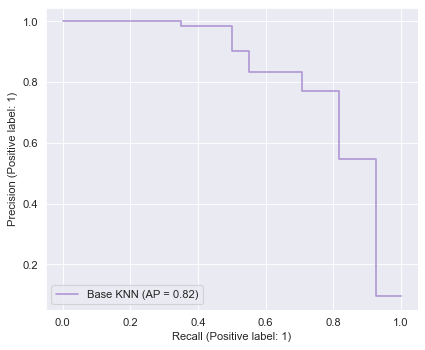

In [137]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(knn_model, X_test3, y_test3, ax=ax, name='Base KNN', color='#ae97d3')
plt.show()

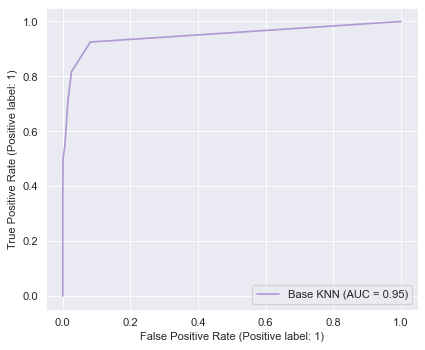

In [138]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(knn_model, X_test3, y_test3, ax=ax, name='Base KNN', color='#ae97d3')
plt.show()

In [139]:
from sklearn.model_selection import GridSearchCV

# Finding optimal hyperparameters(GridSearchCV)

# Define model
model = KNeighborsClassifier()

# Define search parameters
k_range = range(2, 51)
weight_options = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
leaf_size = range(10, 51, 10)

param_grid = {"n_neighbors": k_range, "weights": weight_options, "metric": metric, "leaf_size": leaf_size}

# Define search
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1, n_jobs=-1)

# Execute search
grid_search=grid.fit(X_train3, y_train3.ravel())

# Summarize result
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Fitting 10 folds for each of 1960 candidates, totalling 19600 fits
Best Score: 0.9608000000000001
Best Hyperparameters: {'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


In [140]:
knn_modelcv = KNeighborsClassifier(leaf_size= 10, metric= 'euclidean', n_neighbors= 4, weights= 'distance')
knn_modelcv.fit(X_train3, y_train3)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4,
                     weights='distance')

In [141]:
y_pred = knn_modelcv.predict(X_test3)

In [142]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test3, y_pred)))

Model accuracy score: 0.9672


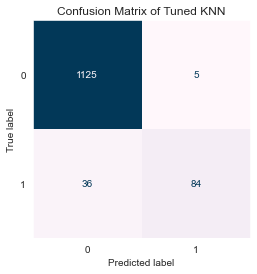

In [143]:
ConfusionMatrixDisplay.from_estimator(knn_modelcv, X_test3, y_test3, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Tuned KNN')
plt.grid(False)

In [144]:
print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1130
           1       0.94      0.70      0.80       120

    accuracy                           0.97      1250
   macro avg       0.96      0.85      0.89      1250
weighted avg       0.97      0.97      0.96      1250



In [145]:
Finalknn_result = metrics_calculator(y_test3, y_pred, 'Tuned KNN')
Finalknn_result

Tuned KNN
Accuracy    0.967200
Precision   0.956406
Recall      0.847788
F1-score    0.892966

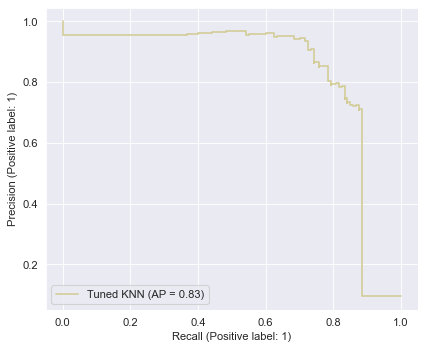

In [146]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(knn_modelcv, X_test3, y_test3, ax=ax, name='Tuned KNN', color='#d3cc97')
plt.show()

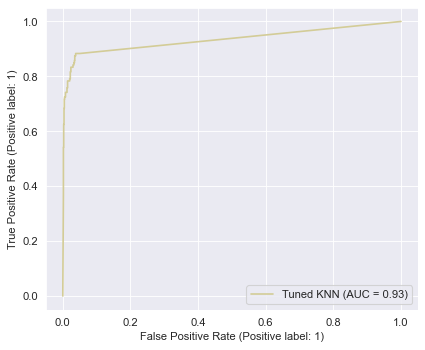

In [147]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(knn_modelcv, X_test3, y_test3, ax=ax, name='Tuned KNN', color='#d3cc97')
plt.show()

In [148]:
df1 = df.copy()

In [149]:
Df = pd.concat([df1, df2])
Df.reset_index(drop=True, inplace=True) 
Df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   
5000   42          16    2.50       3    1.2          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  
5000              1                   1           0       1           1  

[5001 rows x 12 columns]

In [150]:
X_train_sample = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                      "Securities Account", "CD Account", "Online", "CreditCard"]][:5000]
y_train_sample = Df ["Personal Loan"][:5000].ravel()

In [151]:
X_test_sample = Df [["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage",
                     "Securities Account", "CD Account", "Online", "CreditCard"]][5000:]
X_test_sample

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
5000   42          16     2.5       3    1.2          3         0   

      Securities Account  CD Account  Online  CreditCard  
5000                   1           0       1           1

In [152]:
knn_sample = KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4, weights='distance') 
knn_sample.fit(X_train_sample, y_train_sample)

KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4,
                     weights='distance')

In [153]:
y_pred_sample = knn_sample.predict(X_test_sample)

In [154]:
print ("Personal Loan Result:", y_pred_sample)

Personal Loan Result: [0]


In [155]:
Conclusion = pd.concat([Baselog_result, Finallog_result, CNB_result, Baseknn_result, Finalknn_result], axis=1)
Conclusion

Base Logistic  Tuned Logistic  Complement Naive Bayes  Base KNN  \
Accuracy        0.952000        0.952000                0.871000  0.951200   
Precision       0.897270        0.897270                0.705469  0.929115   
Recall          0.805863        0.805863                0.891409  0.771903   
F1-score        0.844042        0.844042                0.750471  0.828748   

           Tuned KNN  
Accuracy    0.967200  
Precision   0.956406  
Recall      0.847788  
F1-score    0.892966

Ensembling

In [156]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].ravel()

In [157]:
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.25 , random_state = 0)

In [158]:
cols = X_train.columns

In [159]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

In [160]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [161]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [162]:
# Ensembling
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
# Define the models
knn = KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=4, weights='distance')
lr = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')
nb = ComplementNB()

# Create the ensemble
ensemble = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('NB', nb)], voting='soft')

# Train the ensemble on the training set
ensemble.fit(X_train, y_train)

# Evaluate the accuracy of the ensemble on the test set
y_pred_voting = ensemble.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_voting)
print(f'The accuracy for the ensembled model is:', accuracy)

# Evaluate the cross-validated accuracy of the ensemble
cross_val_accuracy = cross_val_score(ensemble, X_train, y_train, cv=10, scoring='accuracy')
print(f'The cross-validated accuracy is:', cross_val_accuracy.mean())

The accuracy for the ensembled model is: 0.9608
The cross-validated accuracy is: 0.9597333333333331


In [164]:
Tuned_voting_classifier_result = metrics_calculator(y_test, y_pred_voting, 'Tuned Voting Classifier')
Tuned_voting_classifier_result

Tuned Voting Classifier
Accuracy                  0.960800
Precision                 0.945432
Recall                    0.818178
F1-score                  0.868644

In [165]:
Bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3, weights='distance'),
                                           max_features=0.9, max_samples=0.9, n_estimators=30)

In [166]:
# fit the bagging model on the training set
Bagging.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_bagging = Bagging.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_bagging)
print('Accuracy of the Bagged KNN Model on the test set:', accuracy)

# calculate and print the mean cross-validated score of the bagging model
cross_val_scores = cross_val_score(Bagging, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-validated Score of the Bagged KNN Model:', cross_val_scores.mean())

Accuracy of the Bagged KNN Model on the test set: 0.9688
Cross-validated Score of the Bagged KNN Model: 0.9616000000000001


In [167]:
Tuned_bagged_KNN_result = metrics_calculator(y_test, y_pred_bagging, 'Tuned Bagged KNN')
Tuned_bagged_KNN_result

Tuned Bagged KNN
Accuracy           0.968800
Precision          0.977695
Recall             0.841224
F1-score           0.895452

In [168]:
import xgboost as xg

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
# define the AdaBoost model with default hyperparameters
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

# define the hyperparameters to tune
params = {'n_estimators': [200, 500, 900], 'learning_rate': [0.1, 0.01, 1]}

# base_estimator__max_depth = [1, 2, 3, 4, 5]

# define the grid search using cross validation
grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=10, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
AdaBoost = grid_search.best_estimator_

# print the best hyperparameters and their corresponding score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 200}


In [171]:
# fit the AdaBoost model on the training set
AdaBoost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_ada = AdaBoost.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_ada)
print('Accuracy of the AdaBoost on the test set:', accuracy)

# calculate and print the mean cross-validated score of the AdaBoost model
cross_val_scores = cross_val_score(AdaBoost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for AdaBoost is:', cross_val_scores.mean())

Accuracy of the AdaBoost on the test set: 0.9896
The Cross-validated Score for AdaBoost is: 0.9821333333333333


In [172]:
Tuned_ada_result = metrics_calculator(y_test, y_pred_ada, 'Tuned AdaBoost')
Tuned_ada_result

Tuned AdaBoost
Accuracy         0.989600
Precision        0.975102
Recall           0.964454
F1-score         0.969702

In [173]:
# Define the GradientBoosting model with default hyperparameters
grad = GradientBoostingClassifier(learning_rate=0.1, random_state=0)

# Define the hyperparameters to tune
parameters = {'n_estimators': [500, 900], 'max_depth': [5, 7]}

#learning_rate = [0.01, 0.1]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]

# Create the grid search object
grid_search = GridSearchCV(grad, parameters, cv=10, scoring='accuracy')

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Gradient_Boosting = grid_search.best_estimator_

# Print the results
print('Best parameters:', grid_search.best_params_)

Best parameters: {'max_depth': 7, 'n_estimators': 500}


In [174]:
# fit the GradientBoosting model on the training set
Gradient_Boosting.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_gradient = Gradient_Boosting.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_gradient)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the GradientBoosting model
cross_val_scores = cross_val_score(Gradient_Boosting, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

Accuracy of the GradientBoosting on the test set: 0.9848
The Cross-validated Score for GradientBoosting is: 0.9895999999999999


In [175]:
Tuned_gradient_boosting_result = metrics_calculator(y_test, y_pred_gradient, 'Tuned Gradient Boosting')
Tuned_gradient_boosting_result

Tuned Gradient Boosting
Accuracy                  0.984800
Precision                 0.960958
Recall                    0.950627
F1-score                  0.955718

In [176]:
# Create XGBoost classifier
xgboost = xg.XGBClassifier(objective='binary:logistic', learning_rate=0.1)

# Set hyperparameters to tune
param_grid = {'n_estimators': [500, 900], 'max_depth': [5, 7]}

#learning_rate = [0.01, 0.1]
#subsample = [0.6, 0.8, 1.0]
#colsample_bytree = [0.6, 0.8, 1.0]
#gamma = [0, 1, 5]

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='accuracy', cv=10)

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Xgboost = grid_search.best_estimator_

# Print results
print('The best hyperparameters are:', grid_search.best_params_)

The best hyperparameters are: {'max_depth': 5, 'n_estimators': 500}


In [177]:
# fit the XGBoost model on the training set
Xgboost.fit(X_train, y_train)

# make predictions on the test set and calculate and print the accuracy
y_pred_Xgboost = Xgboost.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_Xgboost)
print('Accuracy of the GradientBoosting on the test set:', accuracy)

# calculate and print the mean cross-validated score of the XGBoost model
cross_val_scores = cross_val_score(Xgboost, X_train, y_train, cv=10, scoring='accuracy')
print('The Cross-validated Score for GradientBoosting is:', cross_val_scores.mean())

Accuracy of the GradientBoosting on the test set: 0.9832
The Cross-validated Score for GradientBoosting is: 0.9880000000000001


In [178]:
Tuned_XGBoost_result = metrics_calculator(y_test, y_pred_Xgboost, 'Tuned XGBoost')
Tuned_XGBoost_result

Tuned XGBoost
Accuracy        0.983200
Precision       0.959491
Recall          0.942294
F1-score        0.950683

In [179]:
Ensemble_Conclusion = pd.concat([Tuned_voting_classifier_result, Tuned_bagged_KNN_result, Tuned_ada_result, Tuned_gradient_boosting_result, Tuned_XGBoost_result], axis=1)
Ensemble_Conclusion

Tuned Voting Classifier  Tuned Bagged KNN  Tuned AdaBoost  \
Accuracy                  0.960800          0.968800        0.989600   
Precision                 0.945432          0.977695        0.975102   
Recall                    0.818178          0.841224        0.964454   
F1-score                  0.868644          0.895452        0.969702   

           Tuned Gradient Boosting  Tuned XGBoost  
Accuracy                  0.984800       0.983200  
Precision                 0.960958       0.959491  
Recall                    0.950627       0.942294  
F1-score                  0.955718       0.950683

In [180]:
# Tuned AdaBoost
y_pred_tuned_ada = AdaBoost.predict(X_test)

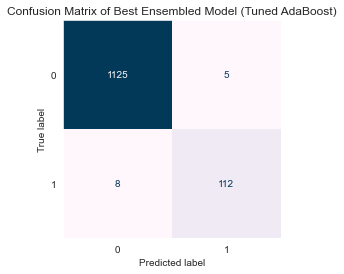

In [181]:
# Tuned AdaBoost
ConfusionMatrixDisplay.from_estimator(AdaBoost, X_test, y_test, colorbar=False, cmap='PuBu')
plt.title('Confusion Matrix of Best Ensembled Model (Tuned AdaBoost)')
plt.grid(False)

In [182]:
# Tuned AdaBoost
print(classification_report(y_test, y_pred_tuned_ada))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.96      0.93      0.95       120

    accuracy                           0.99      1250
   macro avg       0.98      0.96      0.97      1250
weighted avg       0.99      0.99      0.99      1250



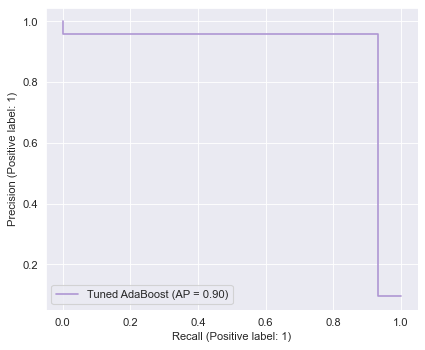

In [183]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
PrecisionRecallDisplay.from_estimator(AdaBoost, X_test, y_test, ax=ax, name='Tuned AdaBoost', color='#ae97d3')
plt.show()

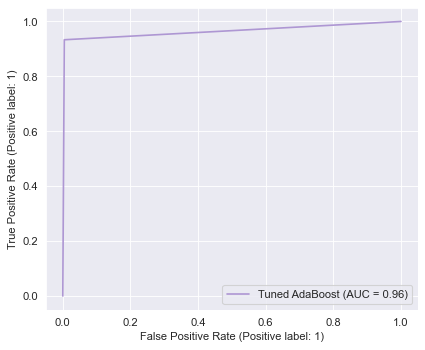

In [184]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(AdaBoost, X_test, y_test, ax=ax, name='Tuned AdaBoost', color='#ae97d3')
plt.show()

Feature Importance

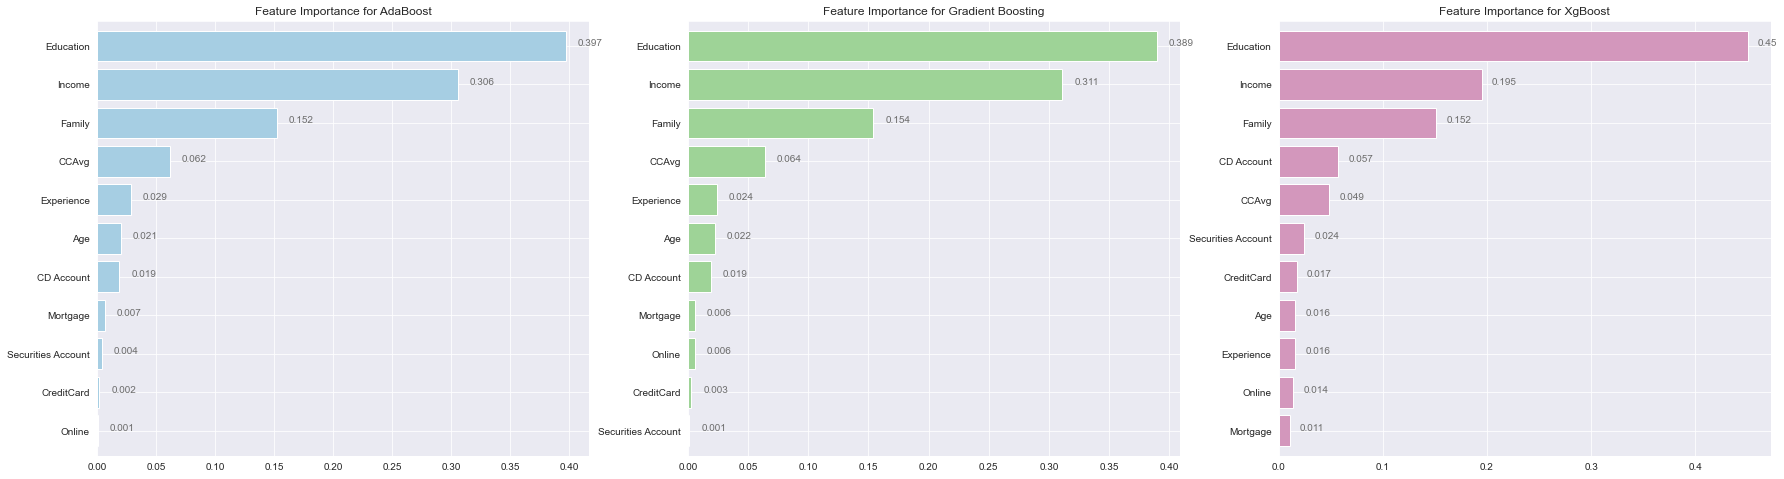

In [185]:
# create a figure with 3 subplots, each for a different model's feature importance
fig, ax = plt.subplots(1, 3, figsize=(30, 8))

# plot AdaBoost's feature importance
feat_imp = pd.Series(AdaBoost.feature_importances_, X.columns).sort_values(ascending=True)
feat_imp.plot.barh(width=0.8, ax=ax[0])
ax[0].set_title('Feature Importance for AdaBoost')

# add text labels for the values of each bar
for i, v in enumerate(feat_imp):
    ax[0].text(v + 0.01, i, str(round(v, 3)), color='#6d6d6d', fontsize=10)

# plot Gradient Boosting's feature importance
feat_imp = pd.Series(Gradient_Boosting.feature_importances_, X.columns).sort_values(ascending=True)
feat_imp.plot.barh(width=0.8, ax=ax[1], color='#9ed397')
ax[1].set_title('Feature Importance for Gradient Boosting')


# add text labels for the values of each bar
for i, v in enumerate(feat_imp):
    ax[1].text(v + 0.01, i, str(round(v, 3)), color='#6d6d6d', fontsize=10)

# plot XgBoost's feature importance
feat_imp = pd.Series(Xgboost.feature_importances_, X.columns).sort_values(ascending=True)
feat_imp.plot.barh(width=0.8, ax=ax[2], color='#d397bc')
ax[2].set_title('Feature Importance for XgBoost')

# add text labels for the values of each bar
for i, v in enumerate(feat_imp):
    ax[2].text(v + 0.01, i, str(round(v, 3)), color='#6d6d6d', fontsize=10)

# display the plot
plt.show()

In [186]:
import pickle

In [187]:
pickle.dump(knn_sample,open('Personal_Bank_Loan.pkl','wb'))